# Name: Chi, Zhang

# Github usrname: ihcgnahz
******
## Data resource: Shootings victims from OpenDataPhilly

In [1]:
#import the library
import pandas as pd
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt 

In [3]:
#read the data
shootings = pd.read_csv("F:/MUSA/MUSA550/assignment-2/shooting_victims_OpenDataPhilly.csv")
shootings.head()

,the_geom,the_geom_webmercator,objectid,year,dc_key,code,date_,time,race,sex,...,location,latino,point_x,point_y,dist,inside,outside,fatal,lat,lng
0,0101000020E6100000D16541934AD052C05C8793C9E3FC...,0101000020110F0000BA341498F4F45FC12B83CAFA728C...,332205,2018,2.020000e+11,411.0,2018/8/30,17:10:00,B,M,...,900 BLOCK Flanders Rd,N,-75.254552,39.975702,19.0,0.0,1.0,N,39.975702,-75.254552
1,0101000020E6100000D16541934AD052C05C8793C9E3FC...,0101000020110F0000BA341498F4F45FC12B83CAFA728C...,332206,2018,2.020000e+11,411.0,2018/8/30,17:10:00,B,M,...,900 BLOCK Flanders Rd,N,-75.254552,39.975702,19.0,0.0,1.0,N,39.975702,-75.254552
2,0101000020E61000005C65F9FCA8C952C09F856F27B202...,0101000020110F00006DC35712B1E95FC1A05D90D9E292...,332207,2018,2.020000e+11,411.0,2018/8/10,22:09:00,B,M,...,1500 BLOCK BLAVIS ST,N,-75.150939,40.021062,39.0,0.0,1.0,N,40.021062,-75.150939
3,0101000020E610000015B22DE2FFCC52C04CFEA346D3FB...,0101000020110F0000198088325DEF5FC15C7708FA448B...,332208,2018,2.020000e+11,411.0,2018/8/11,23:24:00,B,M,...,4000 BLOCK BROWN ST,N,-75.203118,39.967385,16.0,0.0,1.0,N,39.967385,-75.203118
4,0101000020E61000001E999A468BCB52C01FE789290907...,0101000020110F0000A8972349E4EC5FC1BE32C24AB397...,332209,2018,2.020000e+11,411.0,2018/8/12,21:02:00,B,F,...,6600 BLOCK CHEW AVE,N,-75.180376,40.054967,14.0,0.0,1.0,N,40.054967,-75.180376


In [4]:
#drop the unwanted data
unwanted = ['the_geom', 'the_geom_webmercator', 'objectid','dc_key', 'code', 'point_x', 'point_y', 'lat', 'lng']
shootings_final = shootings.drop(unwanted, axis=1)
shootings_final.head(n=10)

,year,date_,time,race,sex,age,wound,officer_involved,offender_injured,offender_deceased,location,latino,dist,inside,outside,fatal
0,2018,2018/8/30,17:10:00,B,M,19.0,chest,N,N,N,900 BLOCK Flanders Rd,N,19.0,0.0,1.0,N
1,2018,2018/8/30,17:10:00,B,M,21.0,multi,N,N,N,900 BLOCK Flanders Rd,N,19.0,0.0,1.0,N
2,2018,2018/8/10,22:09:00,B,M,34.0,back,N,N,N,1500 BLOCK BLAVIS ST,N,39.0,0.0,1.0,N
3,2018,2018/8/11,23:24:00,B,M,20.0,arm,N,N,N,4000 BLOCK BROWN ST,N,16.0,0.0,1.0,N
4,2018,2018/8/12,21:02:00,B,F,31.0,back,N,N,N,6600 BLOCK CHEW AVE,N,14.0,0.0,1.0,N
5,2018,2018/8/12,17:35:00,W,M,19.0,multi,N,N,N,100 BLOCK E LEHIGH AVE,Y,26.0,0.0,1.0,N
6,2018,2018/8/12,21:10:00,B,M,20.0,chest,N,N,N,1000 BLOCK 66TH AVE,N,35.0,0.0,1.0,N
7,2018,2018/8/12,21:10:00,B,M,19.0,arm,N,N,N,1000 BLOCK 66TH AVE,N,35.0,0.0,1.0,N
8,2018,2018/8/12,21:10:00,B,M,19.0,leg,N,N,N,1000 BLOCK 66TH AVE,N,35.0,0.0,1.0,N
9,2018,2018/8/13,22:01:00,B,M,23.0,head,N,N,N,3200 BLOCK N PARK AV,N,25.0,0.0,1.0,N


In [5]:
#transfrom and extract time infromation
shootings_final['date_'] = pd.to_datetime(shootings_final['date_'])
shootings_final['time'] = pd.to_datetime(shootings_final['time'])
shootings_final['Month'] = shootings_final['date_'].dt.month
shootings_final['Hour'] = shootings_final['time'].dt.hour
shootings_final=shootings_final.rename(columns={"dist": "Police District"})
shootings_final['race'] = shootings['race'].replace({"W": "White", "B":"Black"})
shootings_final.head()

,year,date_,time,race,sex,age,wound,officer_involved,offender_injured,offender_deceased,location,latino,Police District,inside,outside,fatal,Month,Hour
0,2018,2018-08-30,2020-09-25 17:10:00,Black,M,19.0,chest,N,N,N,900 BLOCK Flanders Rd,N,19.0,0.0,1.0,N,8,17.0
1,2018,2018-08-30,2020-09-25 17:10:00,Black,M,21.0,multi,N,N,N,900 BLOCK Flanders Rd,N,19.0,0.0,1.0,N,8,17.0
2,2018,2018-08-10,2020-09-25 22:09:00,Black,M,34.0,back,N,N,N,1500 BLOCK BLAVIS ST,N,39.0,0.0,1.0,N,8,22.0
3,2018,2018-08-11,2020-09-25 23:24:00,Black,M,20.0,arm,N,N,N,4000 BLOCK BROWN ST,N,16.0,0.0,1.0,N,8,23.0
4,2018,2018-08-12,2020-09-25 21:02:00,Black,F,31.0,back,N,N,N,6600 BLOCK CHEW AVE,N,14.0,0.0,1.0,N,8,21.0


## Seaborn
******
**Reason of Choice**

Seaborn is very quick to make a pairplot, which can help me have a general understanding of the distribution and relationship between variables before further analyzing.

In [6]:
sample = shootings_final.sample(n=1000)

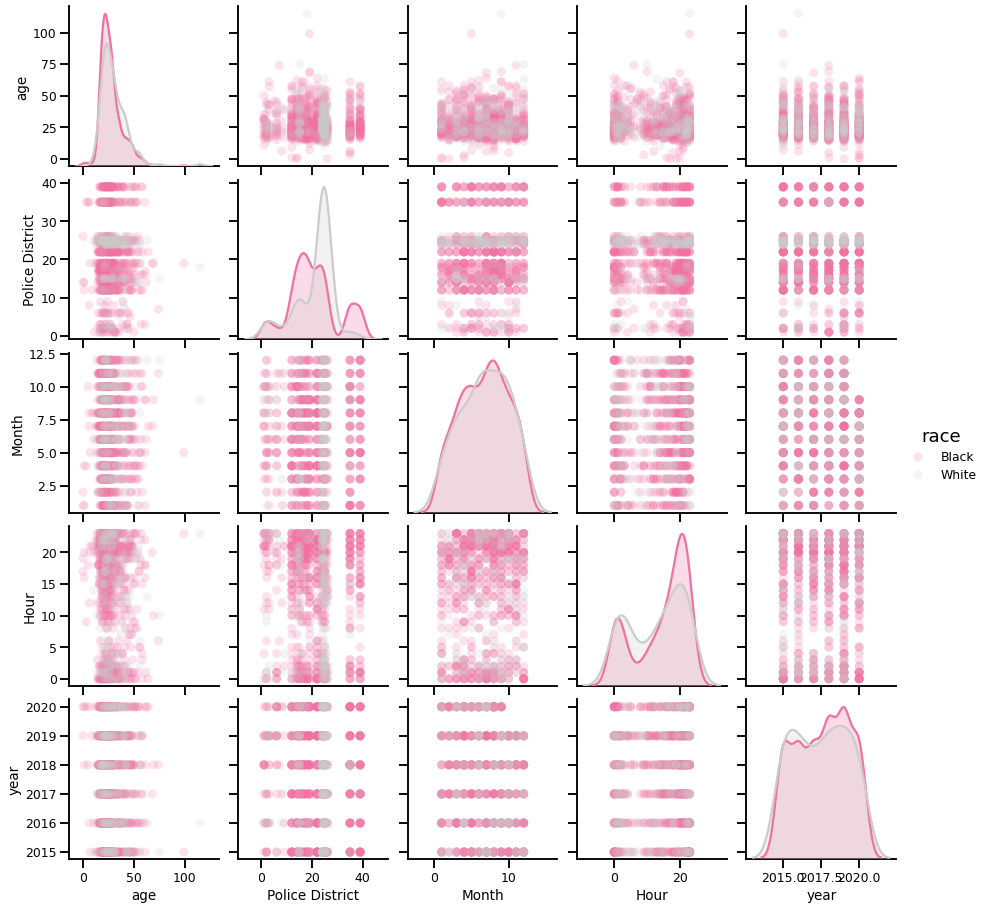

In [7]:
color_map = {"Black": "#F172A1","White":"#CCCCCC"}
variables = [
    "race",
    "age",
    "Police District",
    "Month",
    "Hour",
    "year",
]

# Set the seaborn style
sns.set_context("talk", font_scale=0.75)

# make the pair plot
sns.pairplot(
    sample[variables].dropna(),
    palette=color_map,
    hue="race",
    plot_kws=dict(alpha=0.2, edgecolor="none"),
)

**Discussion**

1.The number of Black victims are much more than the number of white victims.

2.Shootings are more likely to happen at night.

3.Shootings are more likely to happen in some certain district.

4.Most of victims are below 50 years old.

5.There is an outline data from 2010 in the dataset

The following viualization will be around the discussion above.

## Matplotlib
******
**Reason of Choice**

I don't like the default style of bar chart both in Seaborn and Matplotlib. I want to create my own style and I think Matplotlib gives me more free space to do customizing works. In the bar chart below, I customized the opacity, line style of grids, width of bar and quite a lot elements to make it looks clear and simple.

In [8]:
selection_w = shootings_final['race'] == 'White'
w = shootings_final.loc[selection_w]
w_annual = w.groupby(['year'])['race'].count()
w_annual

year
2015    198
2016    227
2017    233
2018    213
2019    252
2020    202
Name: race, dtype: int64

In [9]:
selection_b = shootings_final['race'] == 'Black'
b= shootings_final.loc[selection_b]
b_annual = b.groupby(['year'])['race'].count()
b_annual

year
2010       1
2015    1037
2016    1050
2017     991
2018    1186
2019    1210
2020    1227
Name: race, dtype: int64

F:\anaconda\envs\musa-550-fall-2020\lib\site-packages\ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


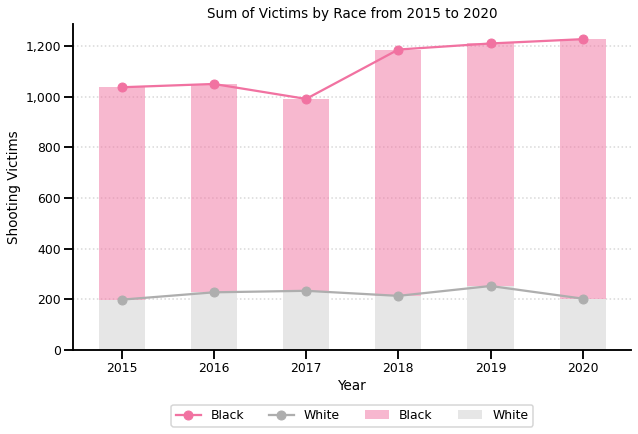

In [10]:
x = ['2015', '2016', '2017', '2018', '2019', '2020']
W = [198, 227, 233, 213, 252, 202]
B = [1037, 1050, 991, 1186, 1210, 1227]

# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(
    x,
    B,
    width=0.5,
    label="Black",
    color="#F172A1",
    alpha=0.5
)

ax.plot(
    x,
    B,
    label="Black",
    color="#F172A1",
    marker="o"
)

ax.bar(
    x,
    W,
     width=0.5,
    label="White",
    color="#e6e6e6",
    alpha=1
)

ax.plot(
    x,
    W,
    label="White",
    color="#aeaeae",
    marker="o"
)

# Format the axes
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, ncol=4)
ax.set_xlabel("Year")
ax.set_ylabel("Shooting Victims")
ax.set_axisbelow(True)
ax.grid(True, axis="y",alpha=0.5,linestyle="dotted")
ax.set_yticklabels([f"{yval:,.0f}" for yval in ax.get_yticks()] )
ax.set_title("Sum of Victims by Race from 2015 to 2020")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

**Discussion**

1.The number of black victims is almost five times of the number of white victims, except for year 2017.

2.The number of white victims is quite steady from 2015 to 2020, while the number of black victims increased obviously from 2017 to 2018.

## Altair
******
**Reason of Choice**

I think one of the disadvantage of Altair is to deal with a dataset over 5000 items, so in this part I usually make a select before visualization. Altair is great to plot interacting scatter charts, because it helpsme to check the tooltip information of some special points.

In [11]:
#select fatal cases from 2015 to 2020
selection_f = shootings_final['fatal'] == 'Y'
fatal = shootings_final.loc[selection_f]
fatal = fatal.dropna(subset=['wound'])
fatal.head()

,year,date_,time,race,sex,age,wound,officer_involved,offender_injured,offender_deceased,location,latino,Police District,inside,outside,fatal,Month,Hour
179,2016,2016-08-08,2020-09-25 02:44:00,White,M,28.0,head,N,N,N,2800 BLOCK S7TH St,N,3.0,1.0,0.0,Y,8,2.0
270,2016,2016-04-10,2020-09-25 02:20:00,White,M,26.0,chest,N,N,N,200 BLOCK EAllegheny Ave,Y,24.0,1.0,0.0,Y,4,2.0
405,2016,2016-04-21,2020-09-25 12:01:00,Black,M,28.0,head,N,N,N,700 BLOCK S58th St,N,18.0,0.0,1.0,Y,4,12.0
442,2020,2020-03-21,2020-09-25 12:41:00,Black,M,17.0,multiple,N,N,N,1800 BLOCK W TIOGA ST,N,39.0,0.0,1.0,Y,3,12.0
538,2020,2020-04-25,2020-09-25 09:05:00,Black,M,32.0,multi/head,N,N,N,4200 BLOCK PENN ST,N,15.0,0.0,1.0,Y,4,9.0


In [12]:
chart = (
    alt.Chart(fatal)
    .mark_circle(size=60)
    .encode(
        x=alt.X("wound", scale=alt.Scale(zero=False),
                sort=alt.EncodingSortField(field='race',op='count',order = 'descending')),
        y=alt.Y("age", scale=alt.Scale(zero=False)),
        tooltip=[ "age","race", "sex","wound","year"],
    ).properties(  
    title='What are the Most Common Wounds Killing Victims from 2015 to 2020?'
    ).configure_mark(opacity=0.2,color='#F172A1')
    .interactive()
)

chart

alt.Chart(...)

**Discussion**

1.Observing the fatal cases, most victims were wounded on/in multi-parts of body, head and back.

2.It is not excluded some victims may die from personal medical history, rather than directly from the wounds.

3.After ckecking with the interactive functions, fatal victims younger than 10 are all blacks.

In [13]:
#select data in 2019
selection = shootings_final['year'] == 2019
selection_2019= shootings_final.loc[selection]
selection_2019.head()
final_2019=selection_2019.dropna(subset=['race'])
final_2019=final_2019.rename(columns={"dist": "Police District"})

In [15]:
# Setup a brush selection
brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x=alt.X('Police District:Q', scale=alt.Scale(domain=(0, 40 ))),
    y=alt.Y('Hour:Q', scale=alt.Scale(domain=(-0.5, 24 ))),
    color=alt.condition(brush,alt.Color('race:N',scale=alt.Scale(
            domain=['Black', 'White'],range=['#F172A1', '#CCCCCC'])),alt.value('lightgray')),
    size='count(race):Q'
).properties(
    selection=brush,
    width=800,
    title='Where and When did Shootings Happen in 2019?'
)

# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
    x='count(race):Q',
    y='race:N',
    color='race:N',
).transform_filter(
    brush.ref() 
    
).properties(
width=800
)                                 
    
chart = alt.vconcat(points, bars, data=final_2019) # vertical stacking
chart


alt.VConcatChart(...)

**Discussion**

1.The total victims of the black is almost fives times of the total number of white victims in 2019. 

2.No.25 is the only police district where the number of white victims exceed that of the black in 2019.

3.Shootings are more likely to happen at night.

In [16]:
#group the data by district and hour, count the accumulated victims
data=shootings_final.groupby(['Police District','Hour'])['race'].count()
data=data.reset_index()
data=data.rename(columns={"race": "Number of Victims"})
data.head(n=10)

,Police District,Hour,Number of Victims
0,1.0,0.0,5
1,1.0,1.0,7
2,1.0,2.0,3
3,1.0,3.0,1
4,1.0,4.0,1
5,1.0,10.0,3
6,1.0,11.0,6
7,1.0,12.0,3
8,1.0,13.0,3
9,1.0,14.0,2


In [17]:
colormap = alt.Scale(
    domain=[0, 10, 30, 60, 100],
    range=[
        "cornflowerblue",
        "mediumseagreen",
        "#FFEE00",
        "darkorange",
        "firebrick",
    ],
    type="sqrt",
)
chart = (
    alt.Chart(data)
    .mark_rect(size=18)
    .encode(
        x=alt.X("Police District:N", axis=alt.Axis(title="Police District",ticks=False )),
        y=alt.Y("Hour:O", axis=alt.Axis(title="Hour",ticks=False )),
        color=alt.Color("Number of Victims", sort="ascending", scale=colormap),
        tooltip=["Police District", "Hour", "Number of Victims"])
    .properties(width=600, height=600,title='Where and When did Shootings Happen from 2015 to 2020?')
)


chart.interactive()

alt.Chart(...)

**Discussion**

1.No.12 to No.39 districts had relatively more shooting victims than No.1 to No.9 districts in the fast five years.

2.Seeing from the accumulated numbers of victims for whole day, No.22, No.24 and No.25 districts ranked top 3.

3.Since the chart shows the accumulated victims for five years, it is also possible that some district at a certain time period has less victims in the recent year.